## Importing and prepping data

In [124]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [2]:
features = []

remote_folder = '9_28_18_Gel_Interface_Vids' #Folder in AWS S3 containing files to be analyzed
bucket = 'mckenna.data'
vids = 5
combos = [['0_4', '0_6'], ['0_6', '0_8'], ['0_8', '1_0'], ['1_0', '1_2']]
gels = [0.4, 0.6, 0.8, 1.0, 1.2]

counter2 = 0
counter = 0
for combo in combos:
    for num in range(1, vids+1):
            filename = 'features_100x_{}_{}_gel_{}_bulk_vid_{}.csv'.format(combo[0], combo[1], combo[1], num)
            print(filename)
            aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
            fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
            print('{} size: {}'.format(filename, fstats.shape))
            fstats['Interface'] = pd.Series(fstats.shape[0]*['{}/{}'.format(combo[0], combo[1])], index=fstats.index)
            fstats['Bulk Agarose'] = pd.Series(fstats.shape[0]*[combo[1]], index=fstats.index)
            fstats['Bulk Agarose Int'] = pd.Series(fstats.shape[0]*[gels[counter2+1]], index=fstats.index)
            if gels[counter2+1] < 1:
                fstats['Bulk Agarose Bin'] = pd.Series(fstats.shape[0]*['low'], index=fstats.index)
            else:
                fstats['Bulk Agarose Bin'] = pd.Series(fstats.shape[0]*['hi'], index=fstats.index)
            fstats['Gel Code'] = pd.Series(fstats.shape[0]*['{}/{} {}'.format(combo[0], combo[1], combo[1])], index=fstats.index)
            fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
            counter = counter + 1
            if counter == 1:
                fstats_tot = fstats
            else:
                fstats_tot = fstats_tot.append(fstats, ignore_index=True)
    counter2 = counter2 + 1

counter = 0
combo = combos[0]
for num in range(1, vids+1):
    try:
        filename = 'features_100x_{}_{}_gel_{}_bulk_vid_{}.csv'.format(combo[0], combo[1], combo[0], num)
        print(filename)
        aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
        fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
        print('{} size: {}'.format(filename, fstats.shape))
        fstats['Interface'] = pd.Series(fstats.shape[0]*['{}/{}'.format(combo[0], combo[0])], index=fstats.index)
        fstats['Bulk Agarose'] = pd.Series(fstats.shape[0]*[combo[0]], index=fstats.index)
        fstats['Bulk Agarose Int'] = pd.Series(fstats.shape[0]*[0.4], index=fstats.index)
        fstats['Gel Code'] = pd.Series(fstats.shape[0]*['{}/{} {}'.format(combo[0], combo[1], combo[0])], index=fstats.index)
        fstats['Bulk Agarose Bin'] = pd.Series(fstats.shape[0]*['low'], index=fstats.index)
        fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
        counter = counter + 1
        fstats_tot = fstats_tot.append(fstats, ignore_index=True)
    except:
        print('Filename missing: '.format(filename))

features_100x_0_4_0_6_gel_0_6_bulk_vid_1.csv
features_100x_0_4_0_6_gel_0_6_bulk_vid_1.csv size: (8907, 67)
features_100x_0_4_0_6_gel_0_6_bulk_vid_2.csv
features_100x_0_4_0_6_gel_0_6_bulk_vid_2.csv size: (8389, 67)
features_100x_0_4_0_6_gel_0_6_bulk_vid_3.csv
features_100x_0_4_0_6_gel_0_6_bulk_vid_3.csv size: (7467, 67)
features_100x_0_4_0_6_gel_0_6_bulk_vid_4.csv
features_100x_0_4_0_6_gel_0_6_bulk_vid_4.csv size: (7592, 67)
features_100x_0_4_0_6_gel_0_6_bulk_vid_5.csv
features_100x_0_4_0_6_gel_0_6_bulk_vid_5.csv size: (6841, 67)
features_100x_0_6_0_8_gel_0_8_bulk_vid_1.csv
features_100x_0_6_0_8_gel_0_8_bulk_vid_1.csv size: (4741, 67)
features_100x_0_6_0_8_gel_0_8_bulk_vid_2.csv
features_100x_0_6_0_8_gel_0_8_bulk_vid_2.csv size: (5788, 67)
features_100x_0_6_0_8_gel_0_8_bulk_vid_3.csv
features_100x_0_6_0_8_gel_0_8_bulk_vid_3.csv size: (5164, 67)
features_100x_0_6_0_8_gel_0_8_bulk_vid_4.csv
features_100x_0_6_0_8_gel_0_8_bulk_vid_4.csv size: (4552, 67)
features_100x_0_6_0_8_gel_0_8_bulk_vi

In [ ]:
fstats_tot.to_csv('features.csv')

In [3]:
fstats_tot[fstats_tot['Bulk Agarose']=='1_0']

,AR,Bulk Agarose,Bulk Agarose Bin,Bulk Agarose Int,D_fit,Deff1,Deff2,Gel Code,Interface,MSD_ratio,...,asymmetry2,asymmetry3,boundedness,efficiency,elongation,fractal_dim,frames,kurtosis,straightness,trappedness
67485,1.082180,1_0,hi,1.0,8.258093,1.795661,0.574943,0_8/1_0 1_0,0_8/1_0,0.478476,...,0.370138,0.111675,0.044383,0.008163,0.075939,2.699697,238.0,2.112198,0.007496,-0.213674
67486,1.435079,1_0,hi,1.0,0.017868,0.002514,0.000243,0_8/1_0 1_0,0_8/1_0,0.475725,...,0.628037,0.026447,0.050347,0.001671,0.303174,4.108280,651.0,3.527024,0.001813,-0.211857
67487,1.054839,1_0,hi,1.0,0.016214,0.001956,0.000191,0_8/1_0 1_0,0_8/1_0,0.263561,...,0.756323,0.009671,0.087075,0.003376,0.051988,5.095392,651.0,2.937710,0.002566,-0.200729
67488,1.170217,1_0,hi,1.0,0.004934,0.000729,0.000071,0_8/1_0 1_0,0_8/1_0,0.400817,...,0.641035,0.024215,0.049163,0.000343,0.145458,4.513644,651.0,2.869751,0.000818,-0.212218
67489,1.003974,1_0,hi,1.0,0.041818,0.004916,0.000507,0_8/1_0 1_0,0_8/1_0,0.545030,...,0.790115,0.006897,0.090152,0.000942,0.003958,4.896631,651.0,3.073594,0.001358,-0.199802
67490,1.093105,1_0,hi,1.0,0.011256,0.001237,0.000123,0_8/1_0 1_0,0_8/1_0,0.496226,...,0.820609,0.004866,0.082320,0.000308,0.085175,5.068903,651.0,2.954749,0.000775,-0.202165
67491,1.065907,1_0,hi,1.0,0.012957,0.001246,0.000155,0_8/1_0 1_0,0_8/1_0,1.900886,...,0.629580,0.026175,0.037848,0.001668,0.061832,3.887933,651.0,3.075483,0.001821,-0.215668
67492,1.149808,1_0,hi,1.0,0.029528,0.003544,0.000330,0_8/1_0 1_0,0_8/1_0,8.026458,...,0.653730,0.022165,0.062276,0.001542,0.130290,4.367069,651.0,3.249619,0.001736,-0.208232
67493,1.022094,1_0,hi,1.0,0.009061,0.001224,0.000114,0_8/1_0 1_0,0_8/1_0,0.263151,...,0.798750,0.006279,0.060492,0.001015,0.021616,4.644632,651.0,2.662448,0.001418,-0.208773
67494,3.120175,1_0,hi,1.0,5.000977,3.717103,NaN,0_8/1_0 1_0,0_8/1_0,0.031472,...,0.074724,0.463005,0.045776,0.775955,0.679505,1.513482,24.0,1.918972,0.249990,-0.213250


In [ ]:
#PCA analyses with too many datapoints fail. You get rows with lots of NAs. I'm going to try making a subset of the data first
#and then do a PCA analysis on that.

#include all in analysis
import random
subset = np.sort(np.array(random.sample(range(fstats_tot.shape[0]), 500000)))
fstats_sub = fstats_tot.loc[subset, :].reset_index(drop=True)

In [ ]:
fstats_tot['Gel Code'].unique()

In [ ]:
for typ in fstats_tot['Bulk Agarose'].unique():
    fstats_type = fstats_tot[fstats_tot['Bulk Agarose']==typ].reset_index(drop=True)
    print(fstats_type.shape)

In [4]:
#with equal sample sizes for each particle type
import random
counter = 0
for typ in fstats_tot['Bulk Agarose'].unique():
    fstats_type = fstats_tot[fstats_tot['Bulk Agarose']==typ].reset_index(drop=True)
    print(fstats_type.shape)
    subset = np.sort(np.array(random.sample(range(fstats_type.shape[0]), 28000)))
    if counter == 0:
        fstats_sub = fstats_type.loc[subset, :].reset_index(drop=True)
    else:
        fstats_sub = fstats_sub.append(fstats_type.loc[subset, :].reset_index(drop=True), ignore_index=True)
    counter = counter + 1

(39196, 73)
(28289, 73)
(36720, 73)
(32779, 73)
(53997, 73)


In [5]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
nonnum = ['Interface', 'Bulk Agarose', 'Bulk Agarose Int', 'Gel Code', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y',
          'Mean X', 'Mean Y', 'Std X', 'Std Y', 'Bulk Agarose Bin']
fstats_num = fstats_sub.drop(nonnum, axis=1)
fstats_raw = fstats_num.as_matrix()
#fstats

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [6]:
ncomp = 15
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.23450243837952847
1 component: 0.3466135214007564
2 component: 0.41657468095253974
3 component: 0.48544639233459697
4 component: 0.5343725592803653
5 component: 0.5785541041469586
6 component: 0.6146991362769956
7 component: 0.6465950352513039
8 component: 0.6764243426504023
9 component: 0.7036504816037991
10 component: 0.7291227140898993
11 component: 0.7519608249405594
12 component: 0.7740470720235327
13 component: 0.7927847341913674
14 component: 0.810855889674159


In [46]:
pcadataset.components.to_csv('components.csv')

In [57]:
fstats_num.columns

Index(['AR', 'D_fit', 'Deff1', 'Deff2', 'MSD_ratio', 'Mean AR', 'Mean D_fit',
       'Mean Deff1', 'Mean Deff2', 'Mean MSD_ratio', 'Mean Quality',
       'Mean SN_Ratio', 'Mean alpha', 'Mean asymmetry1', 'Mean asymmetry2',
       'Mean asymmetry3', 'Mean boundedness', 'Mean efficiency',
       'Mean elongation', 'Mean fractal_dim', 'Mean frames', 'Mean kurtosis',
       'Mean straightness', 'Mean trappedness', 'Mean_Intensity', 'Quality',
       'SN_Ratio', 'Std AR', 'Std D_fit', 'Std Deff1', 'Std Deff2',
       'Std MSD_ratio', 'Std Quality', 'Std SN_Ratio', 'Std alpha',
       'Std asymmetry1', 'Std asymmetry2', 'Std asymmetry3', 'Std boundedness',
       'Std efficiency', 'Std elongation', 'Std fractal_dim', 'Std frames',
       'Std kurtosis', 'Std straightness', 'Std trappedness', 'alpha',
       'asymmetry1', 'asymmetry2', 'asymmetry3', 'boundedness', 'efficiency',
       'elongation', 'fractal_dim', 'frames', 'kurtosis', 'straightness',
       'trappedness'],
      dtype='object

In [48]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Mean fractal_dim,Mean Quality,Std asymmetry3,asymmetry1,Std trappedness,Std trappedness,D_fit,trappedness,Std kurtosis,Std MSD_ratio,Std MSD_ratio,kurtosis,D_fit,Std Deff2,kurtosis
1,Mean straightness,Std asymmetry3,Mean SN_Ratio,asymmetry2,Std boundedness,Std boundedness,alpha,boundedness,Mean kurtosis,Mean MSD_ratio,Mean MSD_ratio,Std fractal_dim,Std alpha,SN_Ratio,Std Quality
2,Mean efficiency,Std AR,Mean Quality,asymmetry3,Std asymmetry1,Mean SN_Ratio,Mean kurtosis,Std MSD_ratio,alpha,frames,Std kurtosis,Std frames,Std D_fit,Mean Deff2,Std SN_Ratio
3,Mean Deff1,Mean AR,Quality,elongation,Std asymmetry2,SN_Ratio,Std kurtosis,Mean MSD_ratio,D_fit,straightness,D_fit,Std asymmetry1,Mean D_fit,kurtosis,Deff2
4,Mean asymmetry1,Mean_Intensity,Std elongation,efficiency,straightness,Std asymmetry1,Std alpha,Quality,MSD_ratio,Std boundedness,Mean kurtosis,Deff1,Std Deff2,Deff2,Std Deff2


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [58]:
kmostat = pca.kmo(pcadataset.scaled)

0.873514038569


In [ ]:
import scipy.stats as stat
stat.bartlett(pcadataset.scaled[0, :], pcadataset.scaled[1, :], pcadataset.scaled[2, :], pcadataset.scaled[3, :])

In [ ]:
newstr = ''
for i in range(pcadataset.scaled.shape[0]-1):
    newstr = newstr + 'pcadataset.scaled[{}, :], '.format(i)

newstr = 'stat.bartlett(' + newstr + 'pcadataset.scaled[{}, :])'.format(i+1)

In [ ]:
test = eval(newstr)

In [ ]:
test

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [ ]:
fstats_tot['Bulk Agarose'].unique()

In [8]:
import numpy as np
#ncomp = 14
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Bulk Agarose']=='0_4'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Bulk Agarose']=='0_6'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Bulk Agarose']=='0_8'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final['Bulk Agarose']=='1_0'].values[:, -ncomp:], axis=0)
dicti[4] = np.nanmean(pcadataset.final[pcadataset.final['Bulk Agarose']=='1_2'].values[:, -ncomp:], axis=0)

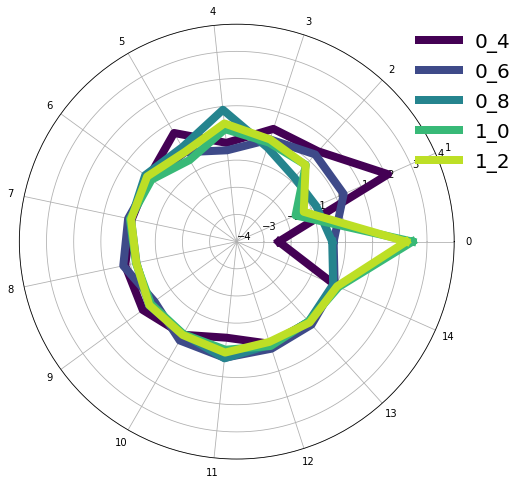

In [9]:
labels = ['0_4', '0_6', '0_8', '1_0', '1_2']
pca.plot_pca(dicti, savefig=True, labels=labels, rticks=np.linspace(-4, 4, 9))

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

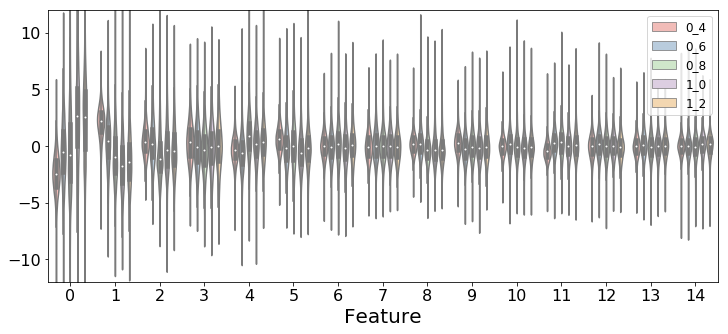

In [10]:
#labels=['10K', '5K', '1K', 'COOH']
feats = pca.feature_violin(pcadataset.final, label='Bulk Agarose', lvals=labels, fsubset=ncomp, yrange=[-12, 12])

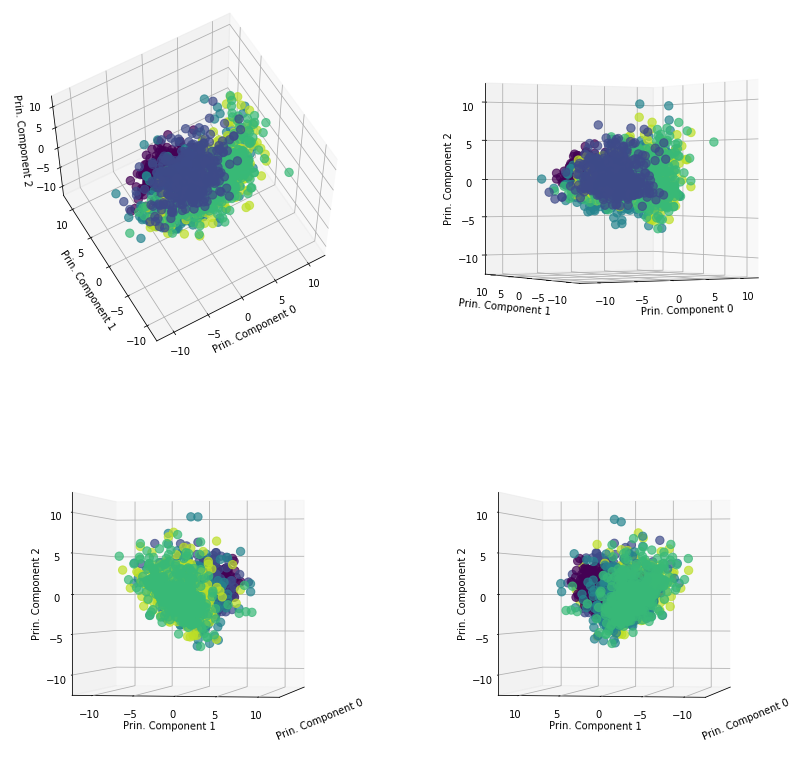

In [11]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Bulk Agarose', lvals=labels, randcount=400, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12])

In [12]:
#ncomp = 14
trainp = np.array([])
testp = np.array([])
labels3 = ['low', 'hi']

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Bulk Agarose Bin', labels3, equal_sampling=True,
                                       tsize=1000, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 5, 3))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Bulk Agarose Bin'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.858593263204193
Run 1: 0.8512941077908274
Run 2: 0.847058084312052
Run 3: 0.8496656735486776
Run 4: 0.8520847623585592
Run 5: 0.8453668165943209
Run 6: 0.8526240830239658
Run 7: 0.853336195747221
Run 8: 0.8552683251213471
Run 9: 0.8436284237699038
Run 10: 0.8464821107858896
Run 11: 0.8626983836088407
Run 12: 0.851885789685885
Run 13: 0.8514040663730947
Run 14: 0.8509066346914091
Run 15: 0.8573837187992522
Run 16: 0.830653311062357
Run 17: 0.8473670155669936
Run 18: 0.8480320031835628
Run 19: 0.8547970740544871


In [13]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.9159750000000001 +/ 0.007532388399438797
0.850526492164142 +/ 0.006455725426644181


In [69]:
#ncomp = 14
trainp = np.array([])
testp = np.array([])

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Bulk Agarose', labels, equal_sampling=True,
                                       tsize=1000, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Bulk Agarose'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.6439750551101943
Run 1: 0.6060498164738901
Run 2: 0.6405087417072902
Run 3: 0.6380634722825831
Run 4: 0.6384509453820013
Run 5: 0.6179462878506239
Run 6: 0.6354715914148528
Run 7: 0.6371628591325839
Run 8: 0.6420062728753122
Run 9: 0.6059869829983088
Run 10: 0.6380896528974086
Run 11: 0.6098983668532472
Run 12: 0.637592221215723
Run 13: 0.640309769034616
Run 14: 0.6383933480293851
Run 15: 0.6384614176279316
Run 16: 0.6437970269293805
Run 17: 0.6373461234363628
Run 18: 0.6381001251433389
Run 19: 0.6376445824453741


In [70]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.6081 +/ 0.014229757552397007
0.6332627329420204 +/ 0.012029254734808934


In [136]:
#ncomp = 14
trainp = np.array([])
testp = np.array([])
labelshort = ['0_4', '1_2']
pcasub = pcadataset.final[pcadataset.final['Bulk Agarose'].isin(labelshort)]

for i in range(0, 1):
    KNNmod, X, y = pca.build_model(pcasub, 'Bulk Agarose', labelshort, equal_sampling=True,
                                       tsize=500, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcasub.values[:, -ncomp:]
    y2 = pcasub['Bulk Agarose'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.9853991887157739


In [17]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.9991 +/ 0.001044030650891056
0.9887768507421407 +/ 0.0010844551000341077


In [110]:
#ncomp = 14
trainp = np.array([])
testp = np.array([])
labelshort = ['0_4', '1_0']
pcasub = pcadataset.final[pcadataset.final['Bulk Agarose'].isin(labelshort)]

for i in range(0, 1):
    KNNmod, X, y = pca.build_model(pcasub, 'Bulk Agarose', labelshort, equal_sampling=True,
                                       tsize=500, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcasub.values[:, -ncomp:]
    y2 = pcasub['Bulk Agarose'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.9927576970137901


In [19]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.9994999999999999 +/ 0.0005916079783099622
0.9914178158448804 +/ 0.0016953073534591236


In [132]:
#ncomp = 14
trainp = np.array([])
testp = np.array([])
labelshort = ['0_4', '0_8']
pcasub = pcadataset.final[pcadataset.final['Bulk Agarose'].isin(labelshort)]

for i in range(0, 1):
    KNNmod, X, y = pca.build_model(pcasub, 'Bulk Agarose', labelshort, equal_sampling=True,
                                       tsize=500, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcasub.values[:, -ncomp:]
    y2 = pcasub['Bulk Agarose'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.9446199839583891


In [21]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.9983000000000001 +/ 0.0026095976701399804
0.9469198891670516 +/ 0.006524341708163358


In [89]:
#ncomp = 14
trainp = np.array([])
testp = np.array([])
labelshort = ['0_4', '0_6']
pcasub = pcadataset.final[pcadataset.final['Bulk Agarose'].isin(labelshort)]

for i in range(0, 1):
    KNNmod, X, y = pca.build_model(pcasub, 'Bulk Agarose', labelshort, equal_sampling=True,
                                       tsize=500, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcasub.values[:, -ncomp:]
    y2 = pcasub['Bulk Agarose'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.8733810479327847


In [23]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.9462499999999998 +/ 0.008613216588476082
0.8758780165892288 +/ 0.004686574022937384


In [119]:
#ncomp = 14
trainp = np.array([])
testp = np.array([])
labelshort = ['0_6', '0_8']
pcasub = pcadataset.final[pcadataset.final['Bulk Agarose'].isin(labelshort)]

for i in range(0, 1):
    KNNmod, X, y = pca.build_model(pcasub, 'Bulk Agarose', labelshort, equal_sampling=True,
                                       tsize=500, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcasub.values[:, -ncomp:]
    y2 = pcasub['Bulk Agarose'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.773253315551604


In [41]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.86025 +/ 0.010885196369381686
0.7636356227309774 +/ 0.009773897910289141


In [140]:
#ncomp = 14
trainp = np.array([])
testp = np.array([])
labelshort = ['0_8', '1_0']
pcasub = pcadataset.final[pcadataset.final['Bulk Agarose'].isin(labelshort)]

for i in range(0, 1):
    KNNmod, X, y = pca.build_model(pcasub, 'Bulk Agarose', labelshort, equal_sampling=True,
                                       tsize=500, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcasub.values[:, -ncomp:]
    y2 = pcasub['Bulk Agarose'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.7705086987955514


In [43]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.8624 +/ 0.016520895859486573
0.7737259456382961 +/ 0.00969916062532311


In [44]:
#ncomp = 14
trainp = np.array([])
testp = np.array([])
labelshort = ['1_2', '1_0']
pcasub = pcadataset.final[pcadataset.final['Bulk Agarose'].isin(labelshort)]

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcasub, 'Bulk Agarose', labelshort, equal_sampling=True,
                                       tsize=500, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcasub.values[:, -ncomp:]
    y2 = pcasub['Bulk Agarose'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

Run 0: 0.569518985884689
Run 1: 0.5500654685678931
Run 2: 0.5880947927308307
Run 3: 0.5767996661822472
Run 4: 0.5777924862228233
Run 5: 0.575490294824386
Run 6: 0.560166333328537
Run 7: 0.5702815867854214
Run 8: 0.5231586065986561
Run 9: 0.5917782989683305
Run 10: 0.5741665347702845
Run 11: 0.5817925437776084
Run 12: 0.5599505028849336
Run 13: 0.5947567590900589
Run 14: 0.5622239168908905
Run 15: 0.5678642858170622
Run 16: 0.5911451963337602
Run 17: 0.5538496956790745
Run 18: 0.5689434380350796
Run 19: 0.5795479071641318


In [45]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.7133999999999999 +/ 0.019566297554724037
0.5708693650268349 +/ 0.016352045395454512


In [26]:
from sklearn.neural_network import MLPRegressor

In [27]:
def build_modelR(rawdata, feature, featvals, equal_sampling=True,
                    tsize=20, from_end=True, input_cols=6, model='KNN',
                    **kwargs):
    """Builds a K-nearest neighbor model using an input dataset.

    Parameters
    ----------
    rawdata : pandas.core.frames.DataFrame
        Raw dataset of n samples and p features.
    feature : string or int
        Feature in rawdata containing output values on which KNN
        model is to be based.
    featvals : string or int
        All values that feature can take.
    equal_sampling : bool
        If True, training dataset will contain an equal number
        of samples that take each value of featvals. If false,
        each sample in training dataset will be taken randomly
        from rawdata.
    tsize : int
        Size of training dataset. If equal_sampling is False,
        training dataset will be exactly this size. If True,
        training dataset will contain N x tsize where N is the
        number of unique values in featvals.
    n_neighbors : int
        Number of nearest neighbors to be used in KNN
        algorithm.
    from_end : int
        If True, in_cols will select features to be used as
        training data defined end of rawdata e.g.
        rawdata[:, -6:]. If False, input_cols will be read
        as a tuple e.g. rawdata[:, 10:15].
    input_col : int or tuple
        Defined in from_end above.

    Returns
    -------
    clf : sklearn.neighbors.classification.KNeighborsClassifier
        KNN model
    X : numpy.ndarray
        training input dataset used to create clf
    y : numpy.ndarray
        training output dataset used to create clf

    """

    defaults = {'NNsolver': 'adam', 'NNalpha': 1e-5,
                'NNhidden_layer': (5, 2), 'NNrandom_state': 1,
                'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
                }

    for defkey in defaults.keys():
        if defkey not in kwargs.keys():
            kwargs[defkey] = defaults[defkey]
    
    if equal_sampling:
        for featval in featvals:
            if from_end:
                test = rawdata[rawdata[feature] == featval
                               ].values[:, -input_cols:]
            else:
                test = rawdata[rawdata[feature] == featval
                               ].values[:, input_cols[0]:input_cols[1]]
            to_plot = np.array(random.sample(range(0, test.shape[0]
                                                   ), tsize))
            if featval == featvals[0]:
                X = test[to_plot, :]
                y = rawdata[rawdata[feature] == featval
                            ][feature].values[to_plot]
            else:
                X = np.append(X, test[to_plot, :], axis=0)
                y = np.append(y, rawdata[rawdata[feature] == featval
                                         ][feature].values[to_plot], axis=0)

    else:
        if from_end:
            test = rawdata.values[:, -input_cols:]
        else:
            test = rawdata.values[:, input_cols[0]:input_cols[1]]
        to_plot = np.array(random.sample(range(0, test.shape[0]), tsize))
        X = test[to_plot, :]
        y = rawdata[feature].values[to_plot]

    if model is 'MLP':
        clf = MLPRegressor(solver=kwargs['NNsolver'], alpha=kwargs['NNalpha'],
                            hidden_layer_sizes=kwargs['NNhidden_layer'],
                            random_state=kwargs['NNrandom_state'],
                            beta_1=kwargs['beta_1'], beta_2=kwargs['beta_2'],
                            epsilon=kwargs['epsilon'])
    
        clf.fit(X, y)
        return clf, X, y

In [38]:
labels2 = [0.4, 0.6, 0.8, 1.0, 1.2]

trainp = np.array([])
testp = np.array([])

for i in range(0, 20):
    MLPmod, X, y = build_modelR(pcadataset.final, 'Bulk Agarose Int', labels2, equal_sampling=True,
                                           tsize=1000, input_cols=ncomp, model='MLP', NNhidden_layer=(13, 11, 9, 7, 5, 3))
    trainp = np.append(trainp, MLPmod.score(X, y))

    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Bulk Agarose Int'].values
    testp = np.append(testp, MLPmod.score(X2, y2))
    print(testp[i])

0.734165840722
0.740109999154
0.736802194383
0.737122772078
0.734631166745
0.737812846354
0.738083749292
0.73935329461
0.747908438121
0.741521259121
0.738182137633
0.733416783314
0.730847734672
0.734482647323
0.735140489361
0.73049020053
0.728300445735
0.7381616965
0.739340473024
0.72797496791


In [39]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.7131817825069166 +/ 0.008278398557202762
0.7361924568291295 +/ 0.004611708107383334


([<matplotlib.axis.YTick at 0x7f3bfa89ee10>,
 <a list of 7 Text yticklabel objects>)

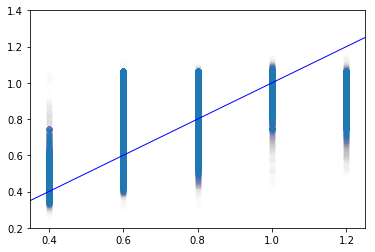

In [31]:
import matplotlib.pyplot as plt
plt.scatter(y2, MLPmod.predict(X2), alpha=0.002)
x = np.linspace(0, 10, 11)
plt.plot(x, x, c='b', linewidth=1)
plt.ylim(0.4, 1.2)
plt.xlim(0.35, 1.25)
ticks = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
plt.xticks(labels2)
plt.yticks(ticks)

([<matplotlib.axis.YTick at 0x7f3bfaa2c5c0>,
 <a list of 7 Text yticklabel objects>)

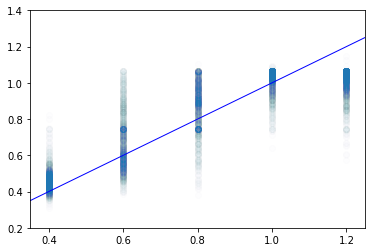

In [32]:
import matplotlib.pyplot as plt
plt.scatter(y, MLPmod.predict(X), alpha=0.006)
x = np.linspace(0, 10, 11)
plt.plot(x, x, c='b', linewidth=1)
plt.ylim(0.4, 1.2)
plt.xlim(0.35, 1.25)
ticks = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
plt.xticks(labels2)
plt.yticks(ticks)

In [36]:
labelshort = [0.4, 0.6, 0.8, 1.0]
pcasub = pcadataset.final[pcadataset.final['Bulk Agarose Int'].isin(labelshort)]
trainp = np.array([])
testp = np.array([])

for i in range(0, 20):
    MLPmod, X, y = build_modelR(pcasub, 'Bulk Agarose Int', labelshort, equal_sampling=True,
                                           tsize=1000, input_cols=ncomp, model='MLP', NNhidden_layer=(13, 11, 9, 7, 5, 3))
    trainp = np.append(trainp, MLPmod.score(X, y))

    X2 = pcasub.values[:, -ncomp:]
    y2 = pcasub['Bulk Agarose Int'].values
    testp = np.append(testp, MLPmod.score(X2, y2))
    print(testp[i])

0.774851417335
0.780047150432
0.773891650407
0.788605309349
0.771783411067
0.777929419156
0.773220130345
0.772706707293
0.76922544693
0.777486344743
0.775376800094
0.777050835666
0.776431095191
0.775061717604
0.769273797678
0.777778176445
0.773992239291
0.784957932292
0.77628397856
0.777572689944


In [37]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.7642350355176875 +/ 0.007145841466521898
0.7761763124911274 +/ 0.004507702533549309


In [141]:
combos = [['0_8', '1_0']]
vids = 5

counter = 0
for combo in combos:
    for num in range(1, vids+1):

        filename = 'features_100x_{}_{}_gel_interface_vid_{}.csv'.format(combo[0], combo[1], num)
        aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
        fstats_new1 = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
        #fstats['Percent Agarose'] = pd.Series(fstats.shape[0]*[str(visc[key])], index=fstats.index)
        #print(fstats_new.shape[0])
        fstats_new1['Video Number'] = pd.Series(fstats_new1.shape[0]*[num], index=fstats_new1.index)
        fstats_new1['Interface'] = pd.Series(fstats_new1.shape[0]*['{}/{}'.format(combo[0], combo[1])], index=fstats_new1.index)
        #print(num)
        print(filename)
        counter = counter + 1
        if counter == 1:
            fstats_tot1 = fstats_new1
        else:
            fstats_tot1 = fstats_tot1.append(fstats_new1, ignore_index=True)

features_100x_0_8_1_0_gel_interface_vid_1.csv
features_100x_0_8_1_0_gel_interface_vid_2.csv
features_100x_0_8_1_0_gel_interface_vid_3.csv
features_100x_0_8_1_0_gel_interface_vid_4.csv
features_100x_0_8_1_0_gel_interface_vid_5.csv


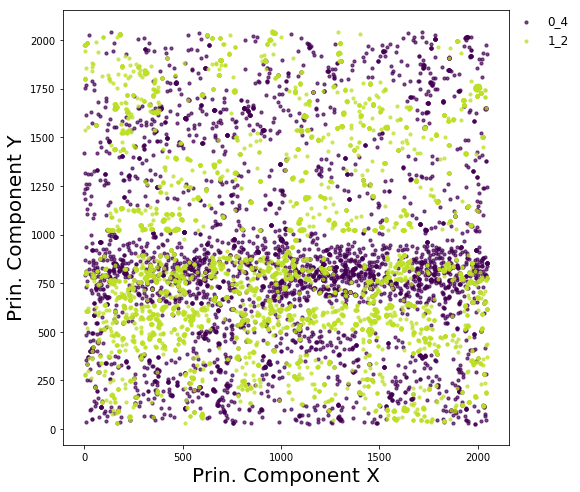

In [139]:
nonnum1 = ['Interface', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y',
          'Mean X', 'Mean Y', 'Std X', 'Std Y']
fstats_num1 = fstats_tot1.drop(nonnum1, axis=1)
interf_data = pca.recycle_pcamodel(pcadataset.pcamodel, fstats_num1)
interf_data['Predicted'] = KNNmod.predict(interf_data[list(range(0, ncomp))])

for col in nonnum1:
    interf_data[col] = fstats_tot1[col]

num=2
rearr = feature_plot_2D(interf_data[interf_data['Video Number']==num],
                            label='Predicted', features=['X', 'Y'], randsel=False, dotsize=10,
                            lvals=['0_4', '1_2'], legendloc=2)

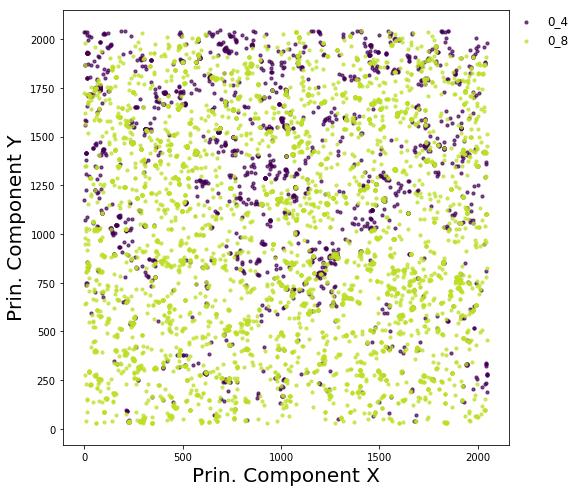

In [135]:
nonnum1 = ['Interface', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y',
          'Mean X', 'Mean Y', 'Std X', 'Std Y']
fstats_num1 = fstats_tot1.drop(nonnum1, axis=1)
interf_data = pca.recycle_pcamodel(pcadataset.pcamodel, fstats_num1)
interf_data['Predicted'] = KNNmod.predict(interf_data[list(range(0, ncomp))])

for col in nonnum1:
    interf_data[col] = fstats_tot1[col]

num=2
rearr = feature_plot_2D(interf_data[interf_data['Video Number']==num],
                            label='Predicted', features=['X', 'Y'], randsel=False, dotsize=10,
                            lvals=['0_4', '0_8'], legendloc=2)

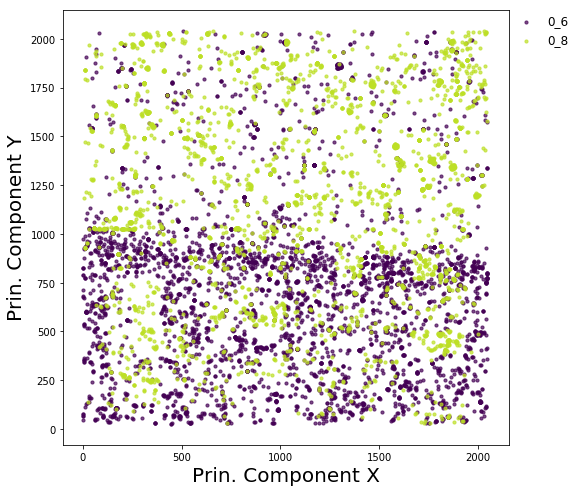

In [131]:
from matplotlib.pyplot import cm
nonnum1 = ['Interface', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y',
          'Mean X', 'Mean Y', 'Std X', 'Std Y']
fstats_num1 = fstats_tot1.drop(nonnum1, axis=1)
interf_data = pca.recycle_pcamodel(pcadataset.pcamodel, fstats_num1)
interf_data['Predicted'] = KNNmod.predict(interf_data[list(range(0, ncomp))])

for col in nonnum1:
    interf_data[col] = fstats_tot1[col]

num=3
rearr = feature_plot_2D(interf_data[interf_data['Video Number']==num],
                            label='Predicted', features=['X', 'Y'], randsel=False, dotsize=10,
                            lvals=['0_6', '0_8'])

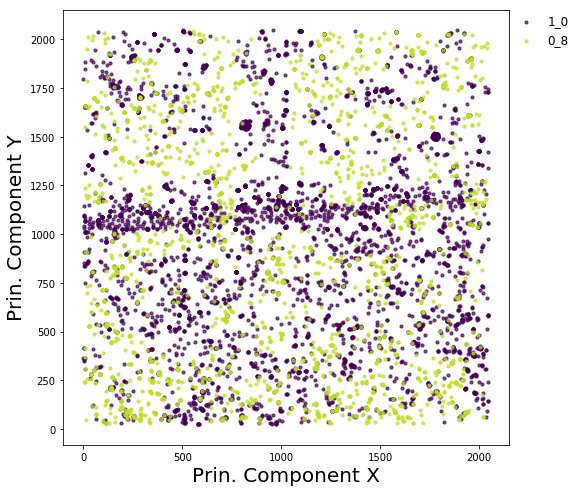

In [143]:
nonnum1 = ['Interface', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y',
          'Mean X', 'Mean Y', 'Std X', 'Std Y']
fstats_num1 = fstats_tot1.drop(nonnum1, axis=1)
interf_data = pca.recycle_pcamodel(pcadataset.pcamodel, fstats_num1)
interf_data['Predicted'] = KNNmod.predict(interf_data[list(range(0, ncomp))])

for col in nonnum1:
    interf_data[col] = fstats_tot1[col]

num=4
rearr = feature_plot_2D(interf_data[interf_data['Video Number']==num],
                            label='Predicted', features=['X', 'Y'], randsel=False, dotsize=10,
                            lvals=['0_8', '1_0'])

In [129]:
def feature_plot_2D(dataset, label, features=[0, 1], lvals=['PEG', 'PS'],
                    randsel=True, randcount=200, **kwargs):

    defaults = {'figsize': (8, 8), 'dotsize': 70, 'alpha': 0.7, 'xlim': None,
                'ylim': None, 'legendfontsize': 12, 'labelfontsize': 20,
                'fname': None, 'legendloc': 2}

    for defkey in defaults.keys():
        if defkey not in kwargs.keys():
            kwargs[defkey] = defaults[defkey]

    tgroups = {}
    xy = {}
    counter = 0
    labels = dataset[label].unique()
    for lval in lvals:
        tgroups[counter] = dataset[dataset[label] == lval]
        counter = counter + 1

    N = len(tgroups)
    color = iter(cm.viridis(np.linspace(0, 0.9, N)))

    fig = plt.figure(figsize=kwargs['figsize'])
    ax1 = fig.add_subplot(111)
    counter = 0
    for key in tgroups:
        c = next(color)
        xy = []
        if randsel:
            to_plot = random.sample(range(0, len(tgroups[key][0].tolist())),
                                    randcount)
            for key2 in features:
                xy.append(list(tgroups[key][key2].tolist()[i] for i in to_plot))
        else:
            for key2 in features:
                xy.append(tgroups[key][key2])
        ax1 = plt.scatter(xy[0], xy[1], c=c, s=kwargs['dotsize'],
                          alpha=kwargs['alpha'], label=labels[counter])
        counter = counter + 1

    if kwargs['xlim'] is not None:
        plt.xlim(kwargs['xlim'])
    if kwargs['ylim'] is not None:
        plt.ylim(kwargs['ylim'])

    plt.legend(fontsize=kwargs['legendfontsize'], frameon=False,
               borderaxespad=0., loc=2,
               bbox_to_anchor=(1, 1))
    plt.xlabel('Prin. Component {}'.format(features[0]),
               fontsize=kwargs['labelfontsize'])
    plt.ylabel('Prin. Component {}'.format(features[1]),
               fontsize=kwargs['labelfontsize'])

    if kwargs['fname'] is None:
        plt.show()
    else:
        plt.savefig(kwargs['fname'])

    return xy